# Case study 1: Visual analytics of the impact of COVID-19 on human mobility in France

In this case, we visualize and analyze the impact of COVID -19 on human mobility in France’s 13 administrative regions. Such spatial analyses could benefit policymaking at different jurisdictional levels. The first step is data preparation. Daily intra-flows of these 13 regions in 2020 were first extracted using the ODT Flow API. Finally, the change rates of each month were rendered on maps, so that the spatial differences between regions can be visually investigated. 

## Import packages

In [27]:
import os
import math
import pandas as pd
import numpy as np
import requests
from io import StringIO
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#### Read the boundary file

In [28]:
subdivision_file = r'gadm01_simplified/gadm36_1.shp'
gdf = gpd.read_file(subdivision_file)

target_place = r'FRA'   # set France as the target place (ISO code)  
gdf_country = gdf[gdf['GID_1'].str[:3] == target_place] # Extract the boundary of the target place

gdf_country.plot(figsize=(20, 10))


#### Obtain 2020 flow data using the ODT Flow API

In [29]:
q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'  #Set query url and parameters for the ODT REST API
params = {"operation": "get_daily_movement_for_all_places",
          "scale": "world_first_level_admin",
          "source": "twitter",
          "begin": "01/01/2020",
          "end": "12/31/2020"
      }
r = requests.get(q, params=params) #Submit request
df = pd.read_csv(StringIO(r.text)) 

df = df[df['place'].str[:3] == target_place] # Extract flows of the target place 

# replace place codes with place names
df = pd.merge(df, gdf_country[['GID_1', "NAME_1"]], left_on='place', right_on="GID_1")
df['place'] = df['NAME_1']
df = df.drop(["NAME_1", "GID_1"], axis=1)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,place,intra_movement
date,,
2020-01-01,Nouvelle-Aquitaine,199
2020-01-02,Nouvelle-Aquitaine,202
2020-01-03,Nouvelle-Aquitaine,203
2020-01-04,Nouvelle-Aquitaine,200
2020-01-05,Nouvelle-Aquitaine,217
2020-01-06,Nouvelle-Aquitaine,216
2020-01-07,Nouvelle-Aquitaine,217
2020-01-08,Nouvelle-Aquitaine,254
2020-01-09,Nouvelle-Aquitaine,234


## Draw a map showing the monthly change compared with January

Group the monthly flows of each administrative region.

In [30]:
groupped = df.groupby([pd.Grouper(freq='M'), 'place'] )['intra_movement'].sum().to_frame()
groupped

intra_movement
date       place                                     
2020-01-31 Auvergne-Rhône-Alpes                 11767
           Bourgogne-Franche-Comté               2156
           Bretagne                              3663
           Centre-Val de Loire                   3178
           Corse                                  651
           Grand Est                             8250
           Hauts-de-France                      13015
           Normandie                             4431
           Nouvelle-Aquitaine                    7272
           Occitanie                             6933
           Pays de la Loire                      3885
           Provence-Alpes-Côte d'Azur            8513
           Île-de-France                        59548
2020-02-29 Auvergne-Rhône-Alpes                 11616
           Bourgogne-Franche-Comté               2143
           Bretagne                              3273
           Centre-Val de Loire                   3125
           Corse                                  630
           Grand Est                             7961
           Hauts-de-France                      11399
           Normandie                             4189
           Nouvelle-Aquitaine                    7602
           Occitanie                             6944
           Pays de la Loire                      3480
           Provence-Alpes-Côte d'Azur            8382
           Île-de-France                        57119
2020-03-31 Auvergne-Rhône-Alpes                  8029
           Bourgogne-Franche-Comté               1707
           Bretagne                              2551
           Centre-Val de Loire                   2535
...                                               ...
2020-10-31 Occitanie                             5519
           Pays de la Loire                      3544
           Provence-Alpes-Côte d'Azur            7117
           Île-de-France                        44574
2020-11-30 Auvergne-Rhône-Alpes                  6661
           Bourgogne-Franche-Comté               1642
           Bretagne                              2235
           Centre-Val de Loire                   2103
           Corse                                  593
           Grand Est                             5119
           Hauts-de-France                       6785
           Normandie                             3075
           Nouvelle-Aquitaine                    4723
           Occitanie                             3987
           Pays de la Loire                      2456
           Provence-Alpes-Côte d'Azur            4815
           Île-de-France                        29489
2020-12-31 Auvergne-Rhône-Alpes                  6627
           Bourgogne-Franche-Comté               1794
           Bretagne                              2406
           Centre-Val de Loire                   2118
           Corse                                  626
           Grand Est                             5104
           Hauts-de-France                       7014
           Normandie                             2947
           Nouvelle-Aquitaine                    4884
           Occitanie                             4098
           Pays de la Loire                      2578
           Provence-Alpes-Côte d'Azur            5189
           Île-de-France                        29055

[156 rows x 1 columns]

Extract the flows of January

In [31]:
dates = groupped.index.get_level_values("date").unique()
jan_data = groupped.loc[dates[0]]   ## dates[0].strftime("%Y-%m-%d")
jan_data

,intra_movement
place,
Auvergne-Rhône-Alpes,11767
Bourgogne-Franche-Comté,2156
Bretagne,3663
Centre-Val de Loire,3178
Corse,651
Grand Est,8250
Hauts-de-France,13015
Normandie,4431
Nouvelle-Aquitaine,7272


Show the map.

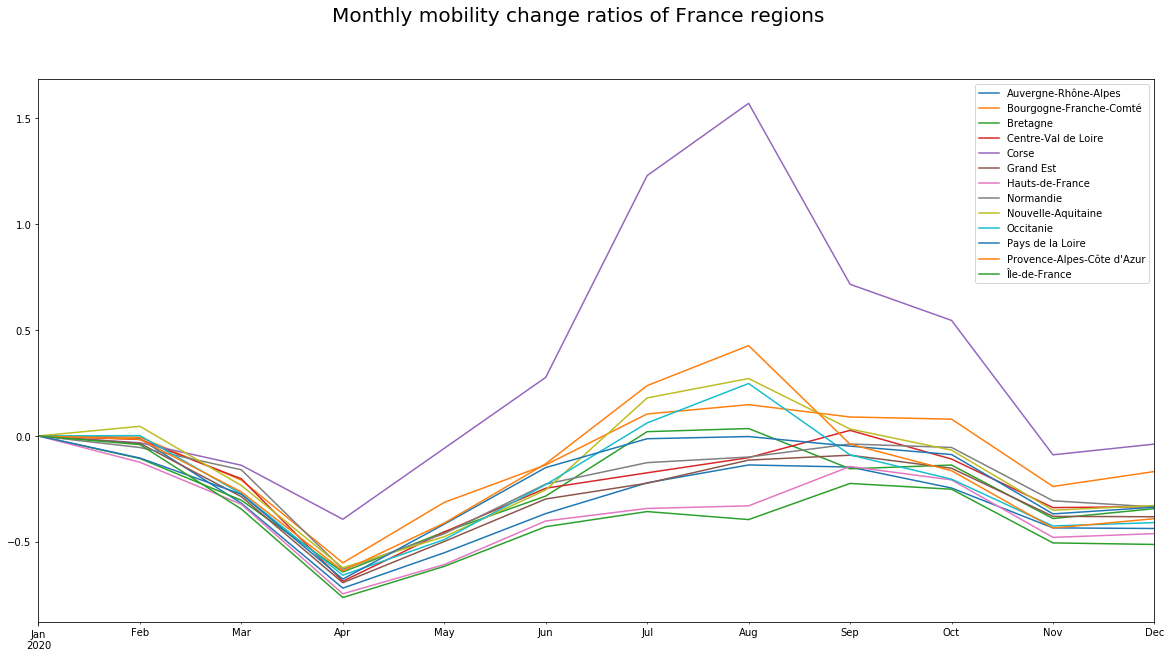

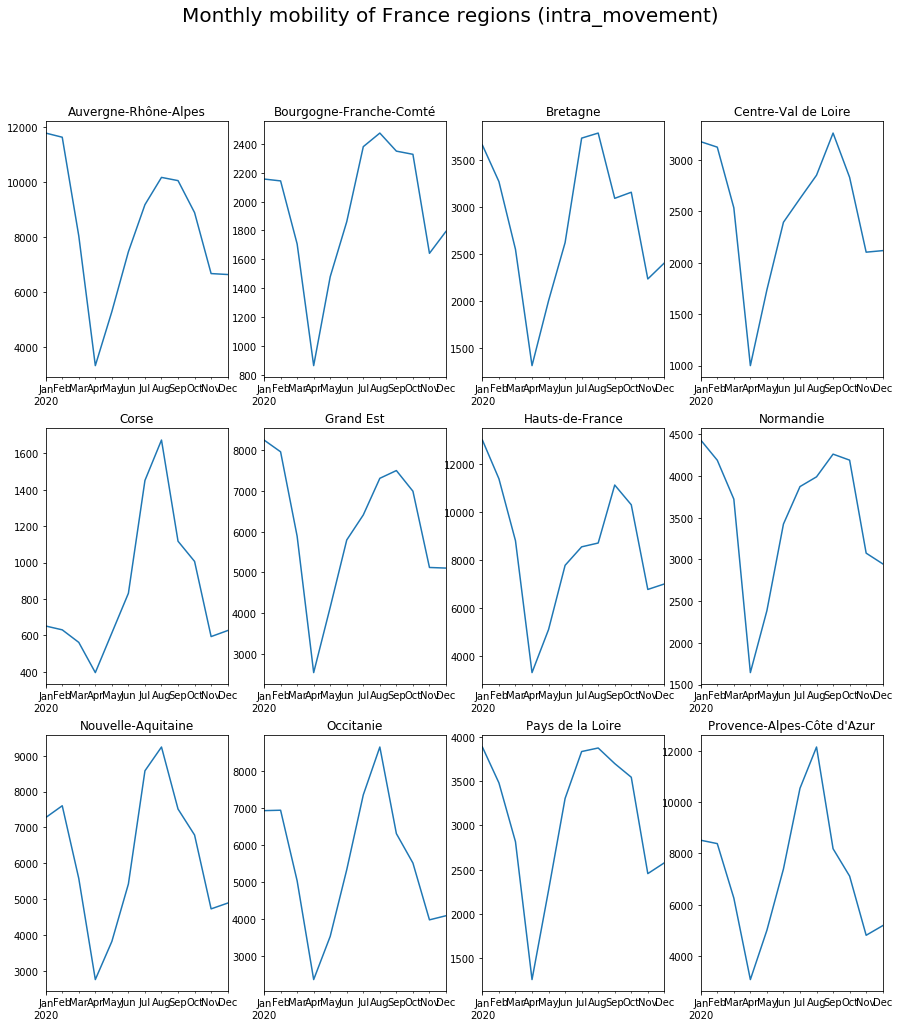

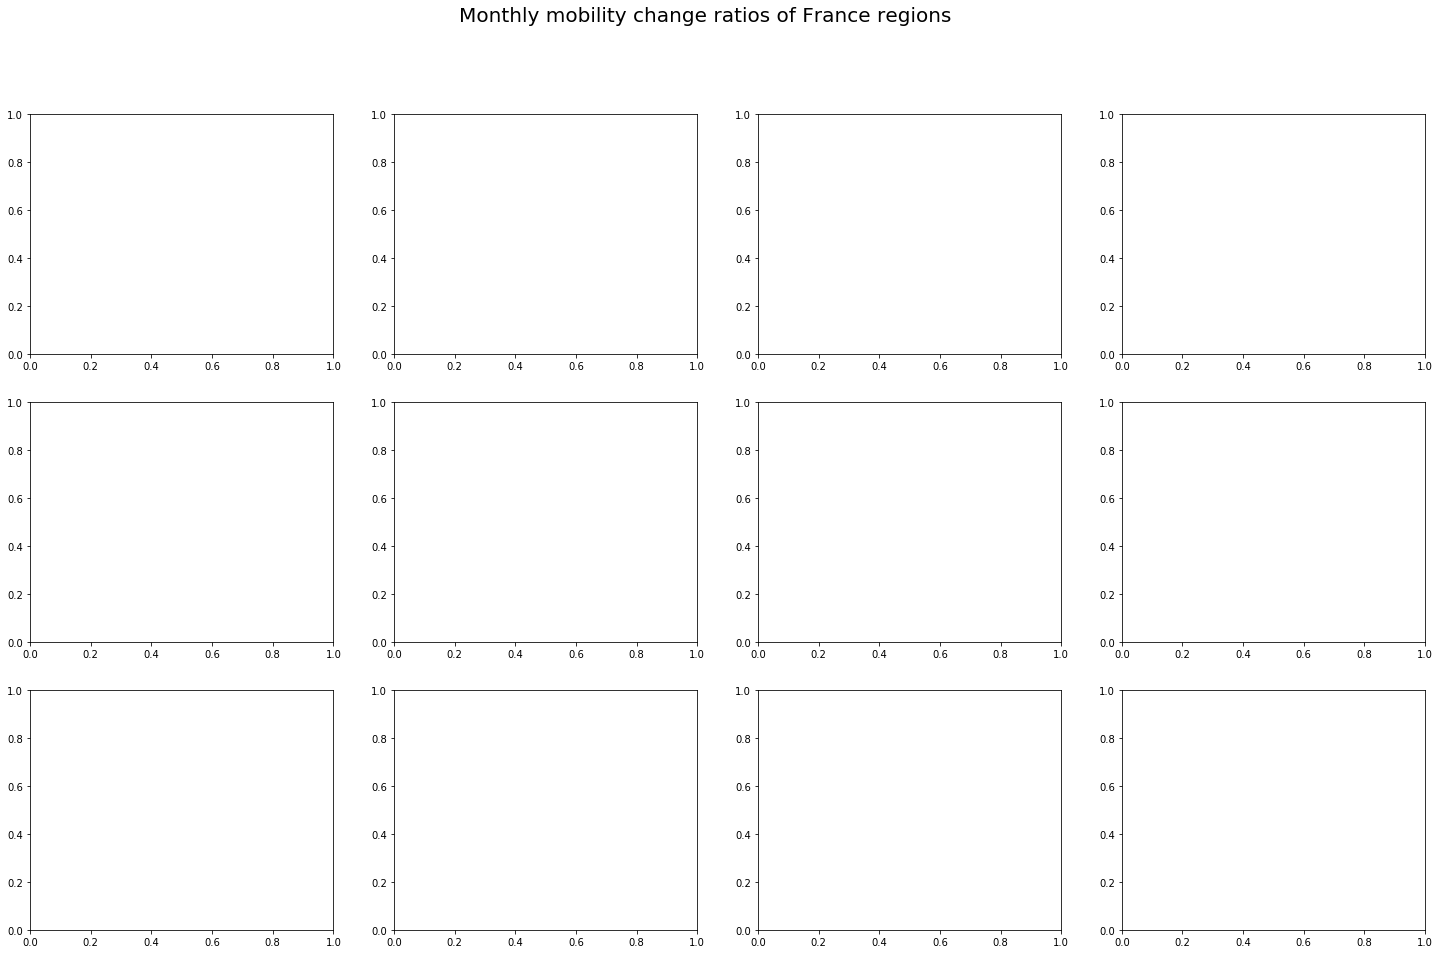

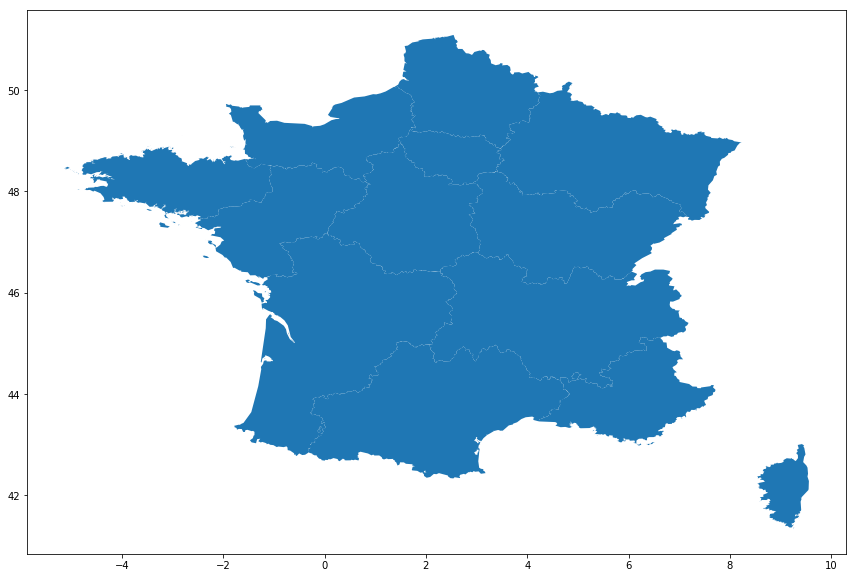

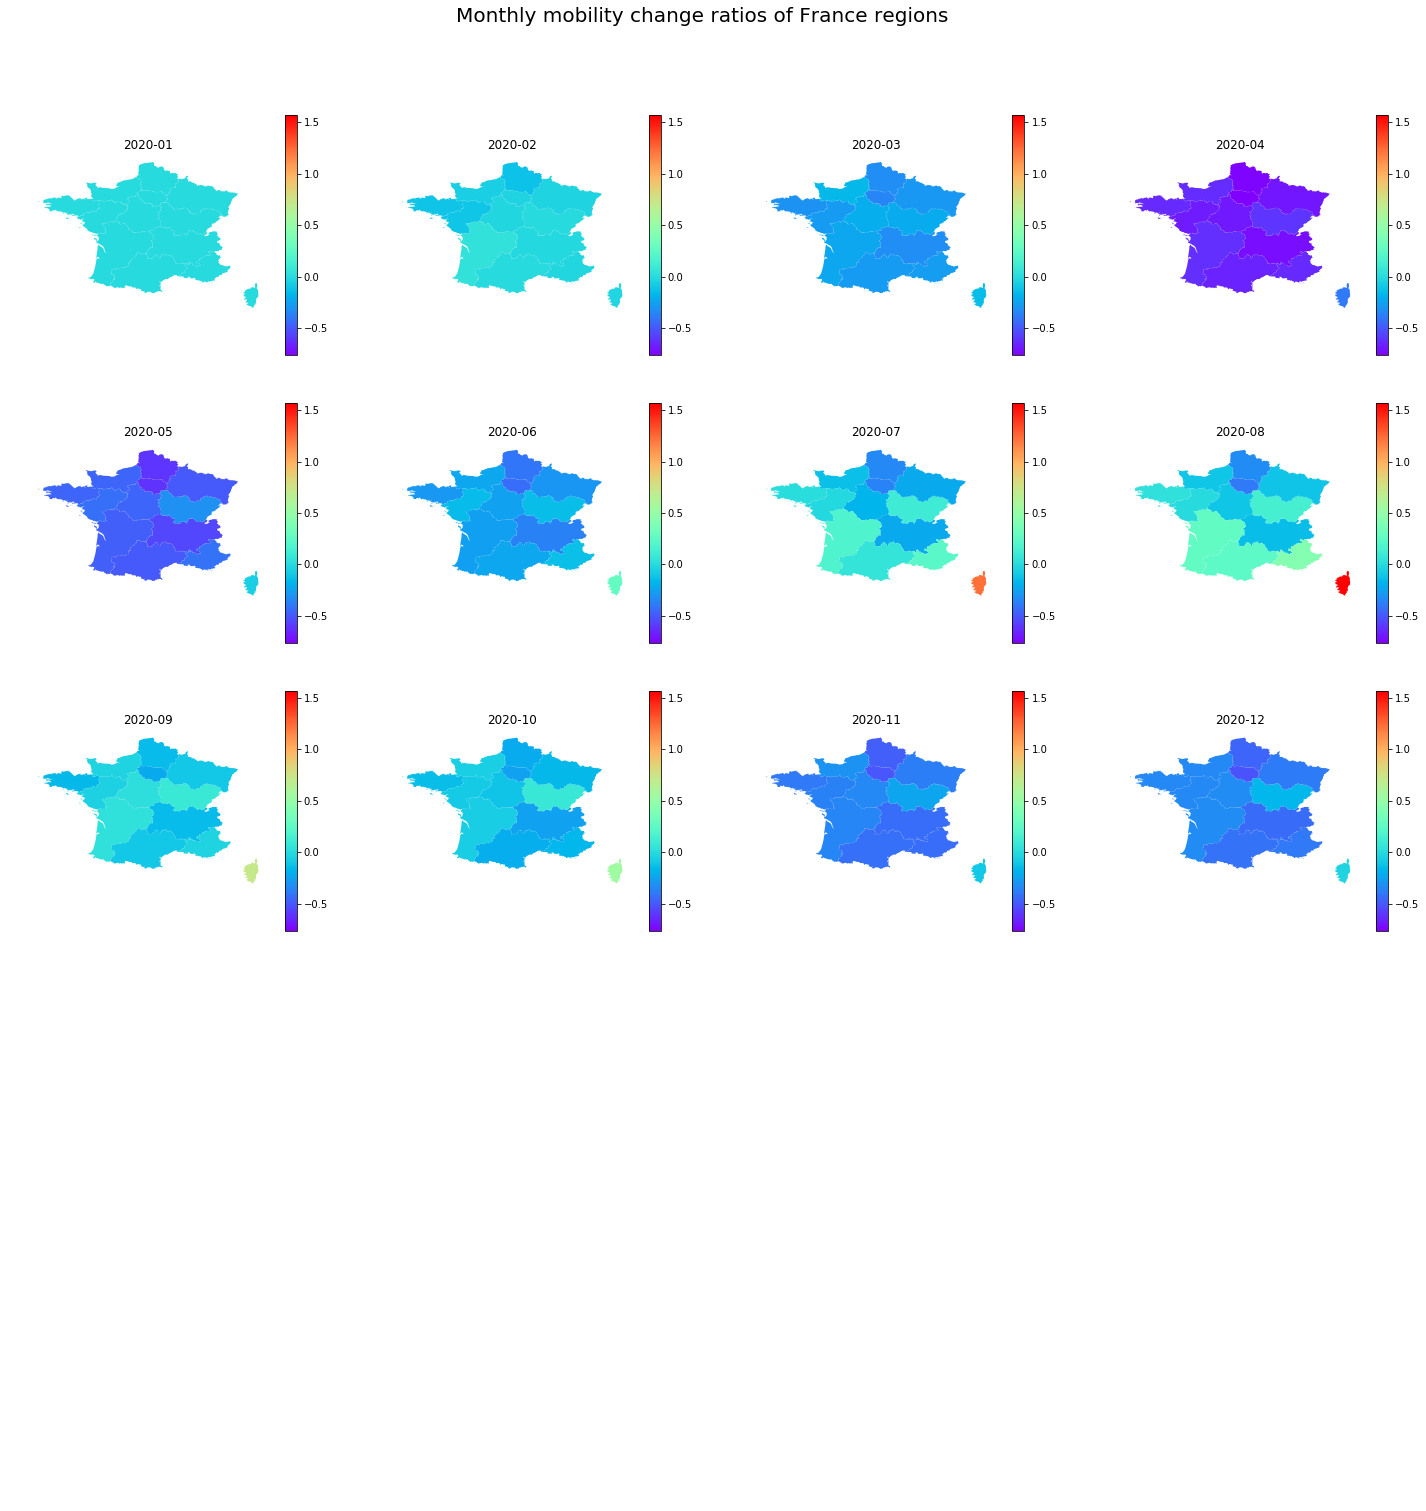

In [32]:
row_cnt = 3
col_cnt = 4
fig, axes = plt.subplots(row_cnt, col_cnt, figsize=(25,15))
fig.suptitle("Monthly mobility change ratios of France regions", fontsize=20) 


# find the range of monthly changes
changes = groupped.groupby(level=[0, 1])['intra_movement'].sum() / jan_data['intra_movement']- 1
vmin= min(changes)
vmax= max(changes)

# draw suplots
for idx, date in enumerate(dates):
    month_df = groupped.loc[date]
    axes[divmod(idx, col_cnt)].axis('off')

    month_df['adjusted'] = (month_df['intra_movement'].to_list() - jan_data['intra_movement']) / jan_data['intra_movement']

    re = gdf_country.set_index('NAME_1').join(month_df, how='left')
    re.plot(column=re['adjusted'], 
            cmap='rainbow',  
            ax=axes[divmod(idx, col_cnt)], 
            legend=True, 
            vmin=vmin,
            vmax=vmax,                       
           )
    axes[divmod(idx, col_cnt)].set_title(date.strftime("%Y-%m"))

plt.show()